# CTC(Connectionist Temporal Classification)
- 입력 음성 프레임 시퀀스와 타겟 단어/음소 시퀀스 간에 명시적인 얼라인먼트(alignment)정보 없이도 음성 인식 모델을 학습할 수 있는 기법

## Motivation
- 음성 인식 모델을 학습하려면 음성(피처) 프레임 각각에 레이블 정보가 있어야 한다.
- 음성 프레임 각각이 어떤 음소인지 정답이 주어져 있어야 함.
- MFCC 같은 음성 피처는 짧은 시간(대개 25ms)로 잘게 쪼개서 만들게 된다.
- 음성 프레임 각각에 레이블(음소)를 달아줘야 하기 때문에 다량의 레이블링을 해야 하고(고비용) 인간은 이같은 짧은 구간의 음성을 분간하기 어려워 레이블링 정확도가 떨어짐.

- **CTC(Connectionist Temporal Classification)** : 입력 음성 프레임 시퀀스와 타겟 단어/음소 시퀀스 간에 명시적인 얼라인먼트(alignment)정보 없이도 음성 인식 모델을 학습할 수 있도록 고안됨.
- 입력 프레임 각각에 레이블을 달아놓지 않아도 음성 인식 모델을 학습할 수 있다는 것.
- 음성 인식 태스크가 아니어도 소스에서 타겟으로 변환하는 모든 시퀀스 분류 과제에 CTC를 적용할 수 있다.(예: 손글씨 실시간 인식, 이미지 프레임 시퀀스를 단어 시퀀스로 변환)

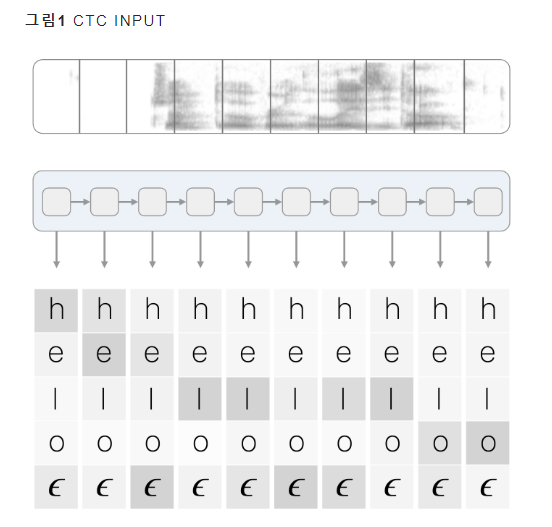

- CTC기법은 시퀀스 분류를 위한 딥러닝 모델 맨 마지막에 **손실(loss) 및 그래디언트 계산 레이어**로 구현됨.
- CTC 레이어의 입력은 출력 확률 벡터 시퀀스.(그림1 하단)
- 그림1에서는 RNN(Recurrent Neural Network)가 CTC 입력에 쓰이는 확률 벡터 시퀀스를 만드는데 쓰임.
- 트랜스포머(Transformer)등 시퀀스 출력을 가지는 어떤 아키텍처든 CTC기법을 적용할 수 있다.

- CTC레이어가 입력 받는 확률 벡터의 차원수는 **레이블 수 + 1**
- 1이 추가된 이유는 ϵ(blank)가 포함되었기 때문. 
- 한국어 전체 음소 수가 42개라면 CTC에 들어가는 확률 벡터 차원 수는 43차원.
- CTC 레이어에서는 그림 1 하단과 같은 확률 벡터 시퀀스를 입력받아 손실을 계산하고 그에 따른 그래디언트를 계산해준다.
- 이후 여느 딥러닝 모델을 학습하는 것처럼 역전파(backpropagation)로 모델을 업데이트 한다.

- 그림 2는 CTC 기법으로 학습한 모델을 예측하는 과정을 도식화한 것.
- 입력 프레임별 예측 결과를 디코딩(decoding)한다.
- 이후 반복된 음소와 **blank**를 제거하는 등의 후처리를 해서 최종 결과물을 산출한다.

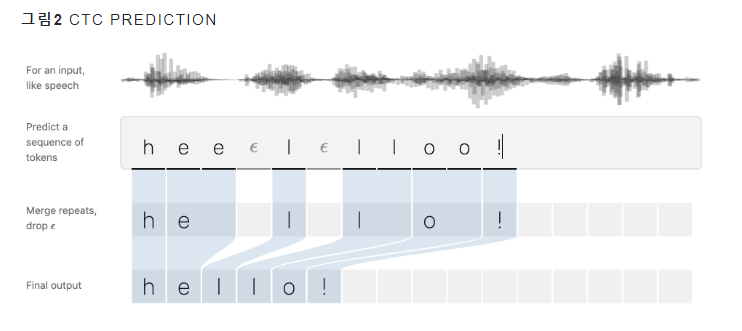